In [551]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [552]:
# Read in data and store it

def get_data(data_csv):
    csvfile = pd.read_csv(data_csv)
    return csvfile


birthrates = get_data("AlaskaBirthRates.csv")
deathrates = get_data("AlaskaDeathRates.csv")
population = get_data("AlaskaPopulation.csv")


birthrates = birthrates.iloc[::-1]
print(birthrates)

deathrates = deathrates.iloc[::-1]
print(deathrates)
# Be sure to remove trailing spaces for column names, then python might not be able to read it!


           Population  BirthRate
26  December 31, 1996     12.670
25  December 31, 1997     12.970
24  December 31, 1998     12.710
23  December 31, 1999     11.320
22  December 31, 2000     11.520
21  December 31, 2001     11.380
20  December 31, 2002     13.810
19  December 31, 2003     12.480
18  December 31, 2004     12.060
17  December 31, 2005     11.690
16  December 31, 2006     12.900
15  December 31, 2007     11.930
14  December 31, 2008     10.650
13  December 31, 2009     10.650
12  December 31, 2010     10.120
11  December 31, 2011     10.290
10  December 31, 2012     10.020
9   December 31, 2013     10.050
8   December 31, 2014      9.994
7   December 31, 2015      9.872
6   December 31, 2016     10.290
5   December 31, 2017      9.712
4   December 31, 2018      9.148
3   December 31, 2019      9.189
2   December 31, 2020      9.179
1   December 31, 2021     10.760
0   December 31, 2022     10.910
           Population  DeathRate
26  December 31, 1996     10.650
25  Decemb

In [553]:
def get_mean_birth_rate(df):
    
    mean = df['BirthRate'].mean()
    
    return mean

mean = get_mean_birth_rate(birthrates)
print(mean)

def get_mean_death_rate(df):
    
    mean = df['DeathRate'].mean()
    
    return mean

mean_birthrate = get_mean_birth_rate(birthrates)
print("Mean Birth Rate from 1996 to 2022: ", round(mean_birthrate, 5))

mean_death_rate = get_mean_death_rate(deathrates)
print("Mean Death Rate from 1996 to 2022: ", round(mean_death_rate, 5))

11.047185185185185
Mean Birth Rate from 1996 to 2022:  11.04719
Mean Death Rate from 1996 to 2022:  10.07478


$dX_T = \Theta(\mu - X_t) + \sigma \sqrt{\Delta t \epsilon_t}$

$X_{t+\Delta t} = X_t + \Theta(\mu - X_t)\Delta t + \sigma \sqrt{\Delta t \epsilon_t},\;\; \epsilon_t \sim \mathcal{N}(0,1)$

$db(t) = \gamma_b(b_e - b(t))dt + \sigma dW_1(t)$

$db(t+\Delta t) = b(t) + \gamma_b(\mu - b(t))\Delta t + \sigma_b \sqrt{\Delta t} \epsilon_t$

27
(27,)
[12.67  12.97  12.71  11.32  11.52  11.38  13.81  12.48  12.06  11.69
 12.9   11.93  10.65  10.65  10.12  10.29  10.02  10.05   9.994  9.872
 10.29   9.712  9.148  9.189  9.179 10.76  10.91 ]


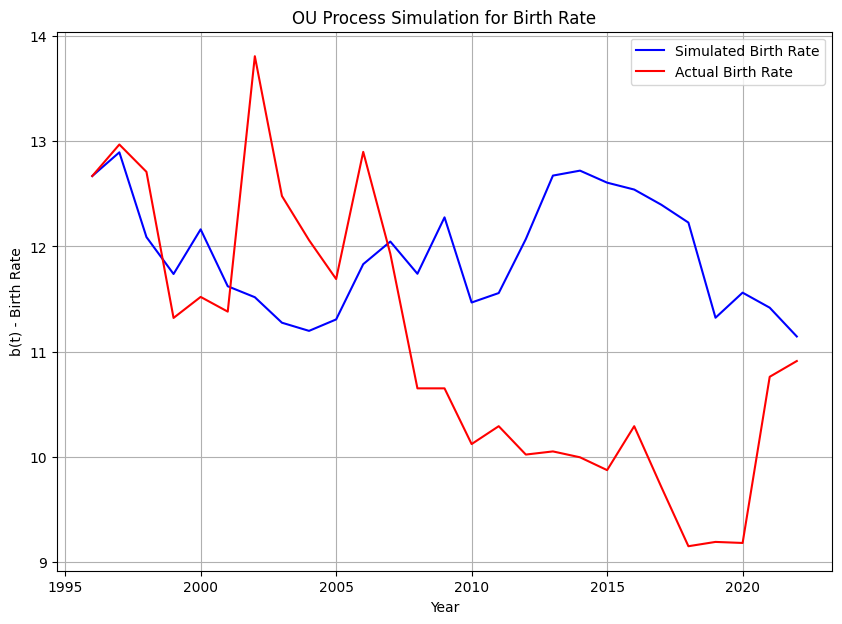

In [554]:
def plot_results_birthrate(gamma_b):
    
    #gamma_b = 0.7
    b_e = mean_birthrate
    sigma = 2
    X_0 = 12.67
    T = len(birthrates.index)
    dt = 1/T
    #N = int(T/dt)
    N = len(birthrates.index)
    print(N)
    X = np.zeros(N)
    X[0] = X_0


    X_actual = birthrates['BirthRate'].tolist()
    X_actual = np.array(X_actual)

    print(X_actual.shape)

    x_vals = list(range(0,27))
    year_labels = [1996 + i for i in x_vals]

    print(X_actual)
    for t in range(1,N):
        dW = np.sqrt(dt) * np.random.normal(0,1)
        X[t] = X[t-1] + gamma_b * (b_e - X[t-1]) * dt + sigma * dW
        
    plt.figure(figsize=(10,7))
    plt.plot(year_labels, X, color="b", label = "Simulated Birth Rate")
    plt.plot(year_labels, X_actual, color="r", label = "Actual Birth Rate")
    plt.title("OU Process Simulation for Birth Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("b(t) - Birth Rate")
    plt.show()
    
plot_results_birthrate(2)

27
(27,)
[10.65  11.18  10.81  10.52  11.19  11.47  11.93  10.44  10.05   9.737
 10.2   10.87  11.48  10.98   9.481  9.196  9.479  9.322  8.985  8.857
  9.126  9.939  9.048  8.642  9.212  9.247  9.978]


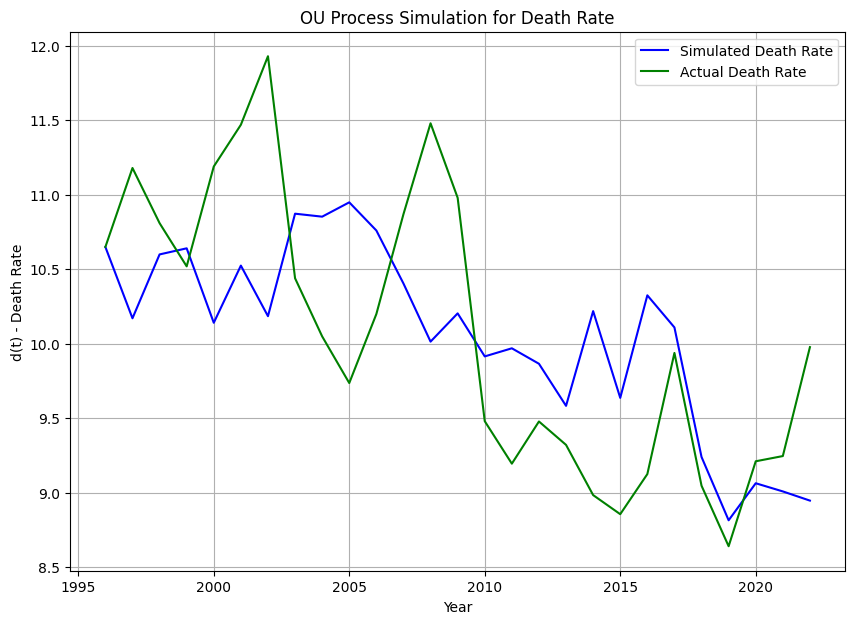

In [555]:
def plot_results_deathrate(gamma_d):
    
    #gamma_d = 0.7
    d_e = mean_death_rate
    sigma = 2
    X_0 = 10.65
    T = len(deathrates.index)
    dt = 1/T
    #N = int(T/dt)
    N = len(deathrates.index)
    print(N)
    X = np.zeros(N)
    X[0] = X_0


    X_actual = deathrates['DeathRate'].tolist()
    X_actual = np.array(X_actual)

    print(X_actual.shape)

    x_vals = list(range(0,27))
    year_labels = [1996 + i for i in x_vals]

    print(X_actual)
    for t in range(1,N):
        dW = np.sqrt(dt) * np.random.normal(0,1)
        X[t] = X[t-1] + gamma_d * (d_e - X[t-1]) * dt + sigma * dW
        
    plt.figure(figsize=(10,7))
    plt.plot(year_labels, X, color="b", label = "Simulated Death Rate")
    plt.plot(year_labels, X_actual, color="g", label = "Actual Death Rate")
    plt.title("OU Process Simulation for Death Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("d(t) - Death Rate")
    plt.show()
    
plot_results_deathrate(2)

27
0.09161256426675499
0.7353424190680046
0.4880064659435144
0.11638111966998878
0.4885744303786245
0.3321410012996401
0.16991725962858273
0.5102766227548527
0.2755495022437294
1.2633344121953676
1.2752613020155978
1.4622621975765717
1.544884189866134
2.1191757867379284
1.5162516384540203
0.9531612773506423
1.2114687589504816
1.7729739974400396
1.6973320990226681
1.5432232385433204
1.7220707781030602
1.9628479489675947
1.339826761210217
1.0157282317522542
1.265798621349993
0.7313292024374706


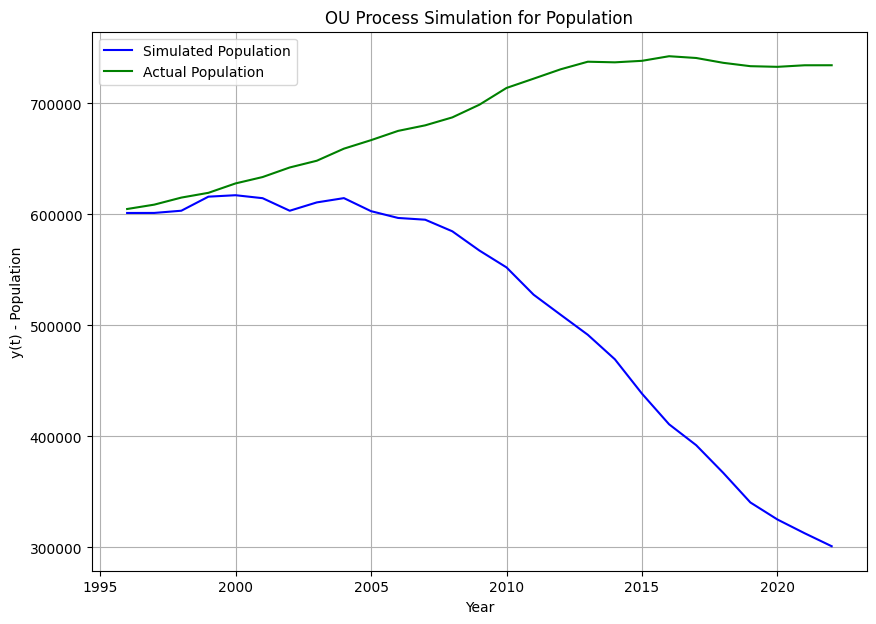

In [556]:
def get_population_model():
    
    gamma_b = 2
    gamma_d = 2
    d_e = 10.08/1000
    b_e = 11.05/1000
    sigma_b = 2
    sigma_d = 2
    
    B_0 = 12.67/1000
    D_0 = 10.65/1000
    Y_0 = 601345
    T = len(deathrates.index)
    dt = 1/T
    #N = int(T/dt)
    N = len(deathrates.index)
    print(N)
    
    Y = np.zeros(N)
    Y[0] = Y_0
    
    B = np.zeros(N)
    B[0] = B_0
    
    D = np.zeros(N)
    D[0] = D_0
    
    Y_actual = population['Population'].tolist()
    Y_actual = np.array(Y_actual)

    x_vals = list(range(0,27))
    year_labels = [1996 + i for i in x_vals]

    for t in range(1,N):
        dW1 = np.sqrt(dt) * np.random.normal(0,1) # Population Weiner Process
        dW2 = np.sqrt(dt) * np.random.normal(0,1) # Birth Rate Weiner Process
        dW3 = np.sqrt(dt) * np.random.normal(0,1) # Death Rate Weiner Process
        
        
        B[t] = max(B[t-1] + gamma_b * (b_e - B[t-1]) * dt + sigma_b * dW2,0)
        D[t] = max(D[t-1] + gamma_d * (d_e - D[t-1]) * dt + sigma_d * dW3,0)
        print(B[t]+D[t])
        
        Y[t] = Y[t-1] + (B[t-1] - D[t-1]) * Y[t-1] * (dt) + np.sqrt(Y[t-1]*(B[t-1] + D[t-1])) * dW1
        
    plt.figure(figsize=(10,7))
    plt.plot(year_labels, Y, color="b", label = "Simulated Population")
    plt.plot(year_labels, Y_actual, color="g", label = "Actual Population")
    plt.title("OU Process Simulation for Population")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("y(t) - Population")
    plt.show()
    
get_population_model()